In [1]:
# Calling the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("avacado.csv")
df.head()

,SN,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df.dtypes

SN                int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [4]:
# changing "Date" datatype as its is in object so that I convert it into datetime datatype
df['Date']=pd.to_datetime(df['Date'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   SN            18249 non-null  int64         
 1   Date          18249 non-null  datetime64[ns]
 2   AveragePrice  18249 non-null  float64       
 3   Total Volume  18249 non-null  float64       
 4   4046          18249 non-null  float64       
 5   4225          18249 non-null  float64       
 6   4770          18249 non-null  float64       
 7   Total Bags    18249 non-null  float64       
 8   Small Bags    18249 non-null  float64       
 9   Large Bags    18249 non-null  float64       
 10  XLarge Bags   18249 non-null  float64       
 11  type          18249 non-null  object        
 12  year          18249 non-null  int64         
 13  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB


In [6]:
df.shape

(18249, 14)

In [7]:
# now I am converting Date feature so that I can be able to use the day and the month columns Later
df["Month"]=df["Date"].dt.month_name()
df["Day"]=df["Date"].dt.day_name()
df["Year"]=df['Date'].dt.year
df.head(2)

,SN,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day,Year
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,December,Sunday,2015
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,December,Sunday,2015


In [8]:
# Lets drop some columns which are no longer required
df.drop(['SN',"Date"],axis=1,inplace=True)
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day,Year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,December,Sunday,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,December,Sunday,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,December,Sunday,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,December,Sunday,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,November,Sunday,2015


In [9]:
df['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [10]:
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [11]:
df['region'].nunique()

54

In [12]:
# lets convert categorical variables (type) to dummy variables(0 and 1)
pd.get_dummies(df['type'])

,conventional,organic
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
18244,0,1
18245,0,1
18246,0,1
18247,0,1


In [13]:
df.head(2)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day,Year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,December,Sunday,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,December,Sunday,2015


In [14]:
# use LabelEncoder to convert categorical data into int
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['type']=le.fit_transform(df['type'])

In [15]:
# checking Missing values
df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
Day             0
Year            0
dtype: int64

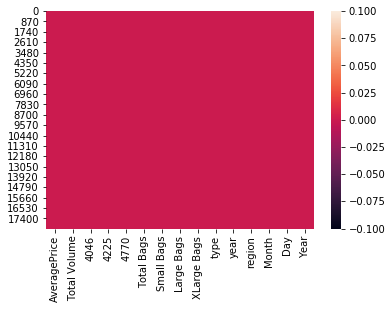

In [16]:
sns.heatmap(df.isnull())

In [17]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'Month', 'Day', 'Year'],
      dtype='object')

In [18]:
# To check Correlation
dfcor=df.corr()

In [19]:
dfcor

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Year
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,0.093197
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,0.017193
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,0.003353
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,-0.009559
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,-0.036531
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,0.071552
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,0.063915
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,0.087891
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.081033,0.081033
type,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,-0.217788,-0.220535,-0.193177,-0.175483,1.000000,-0.000032,-0.000032


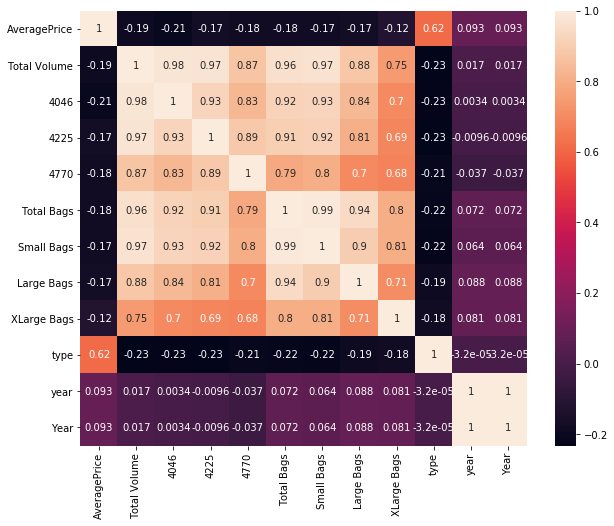

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(dfcor,annot=True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 12 Text xticklabel objects>)

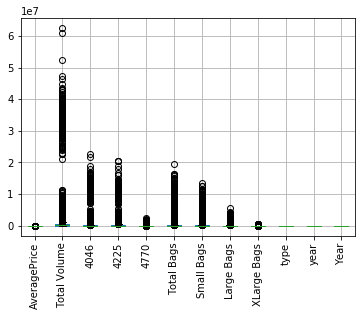

In [21]:
# Plotting outliers
df.boxplot()
plt.xticks(rotation="vertical")

In [22]:
df.drop("year",axis=1,inplace=True)

In [23]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Month,Day,Year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,Albany,December,Sunday,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,Albany,December,Sunday,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,Albany,December,Sunday,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,Albany,December,Sunday,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,Albany,November,Sunday,2015


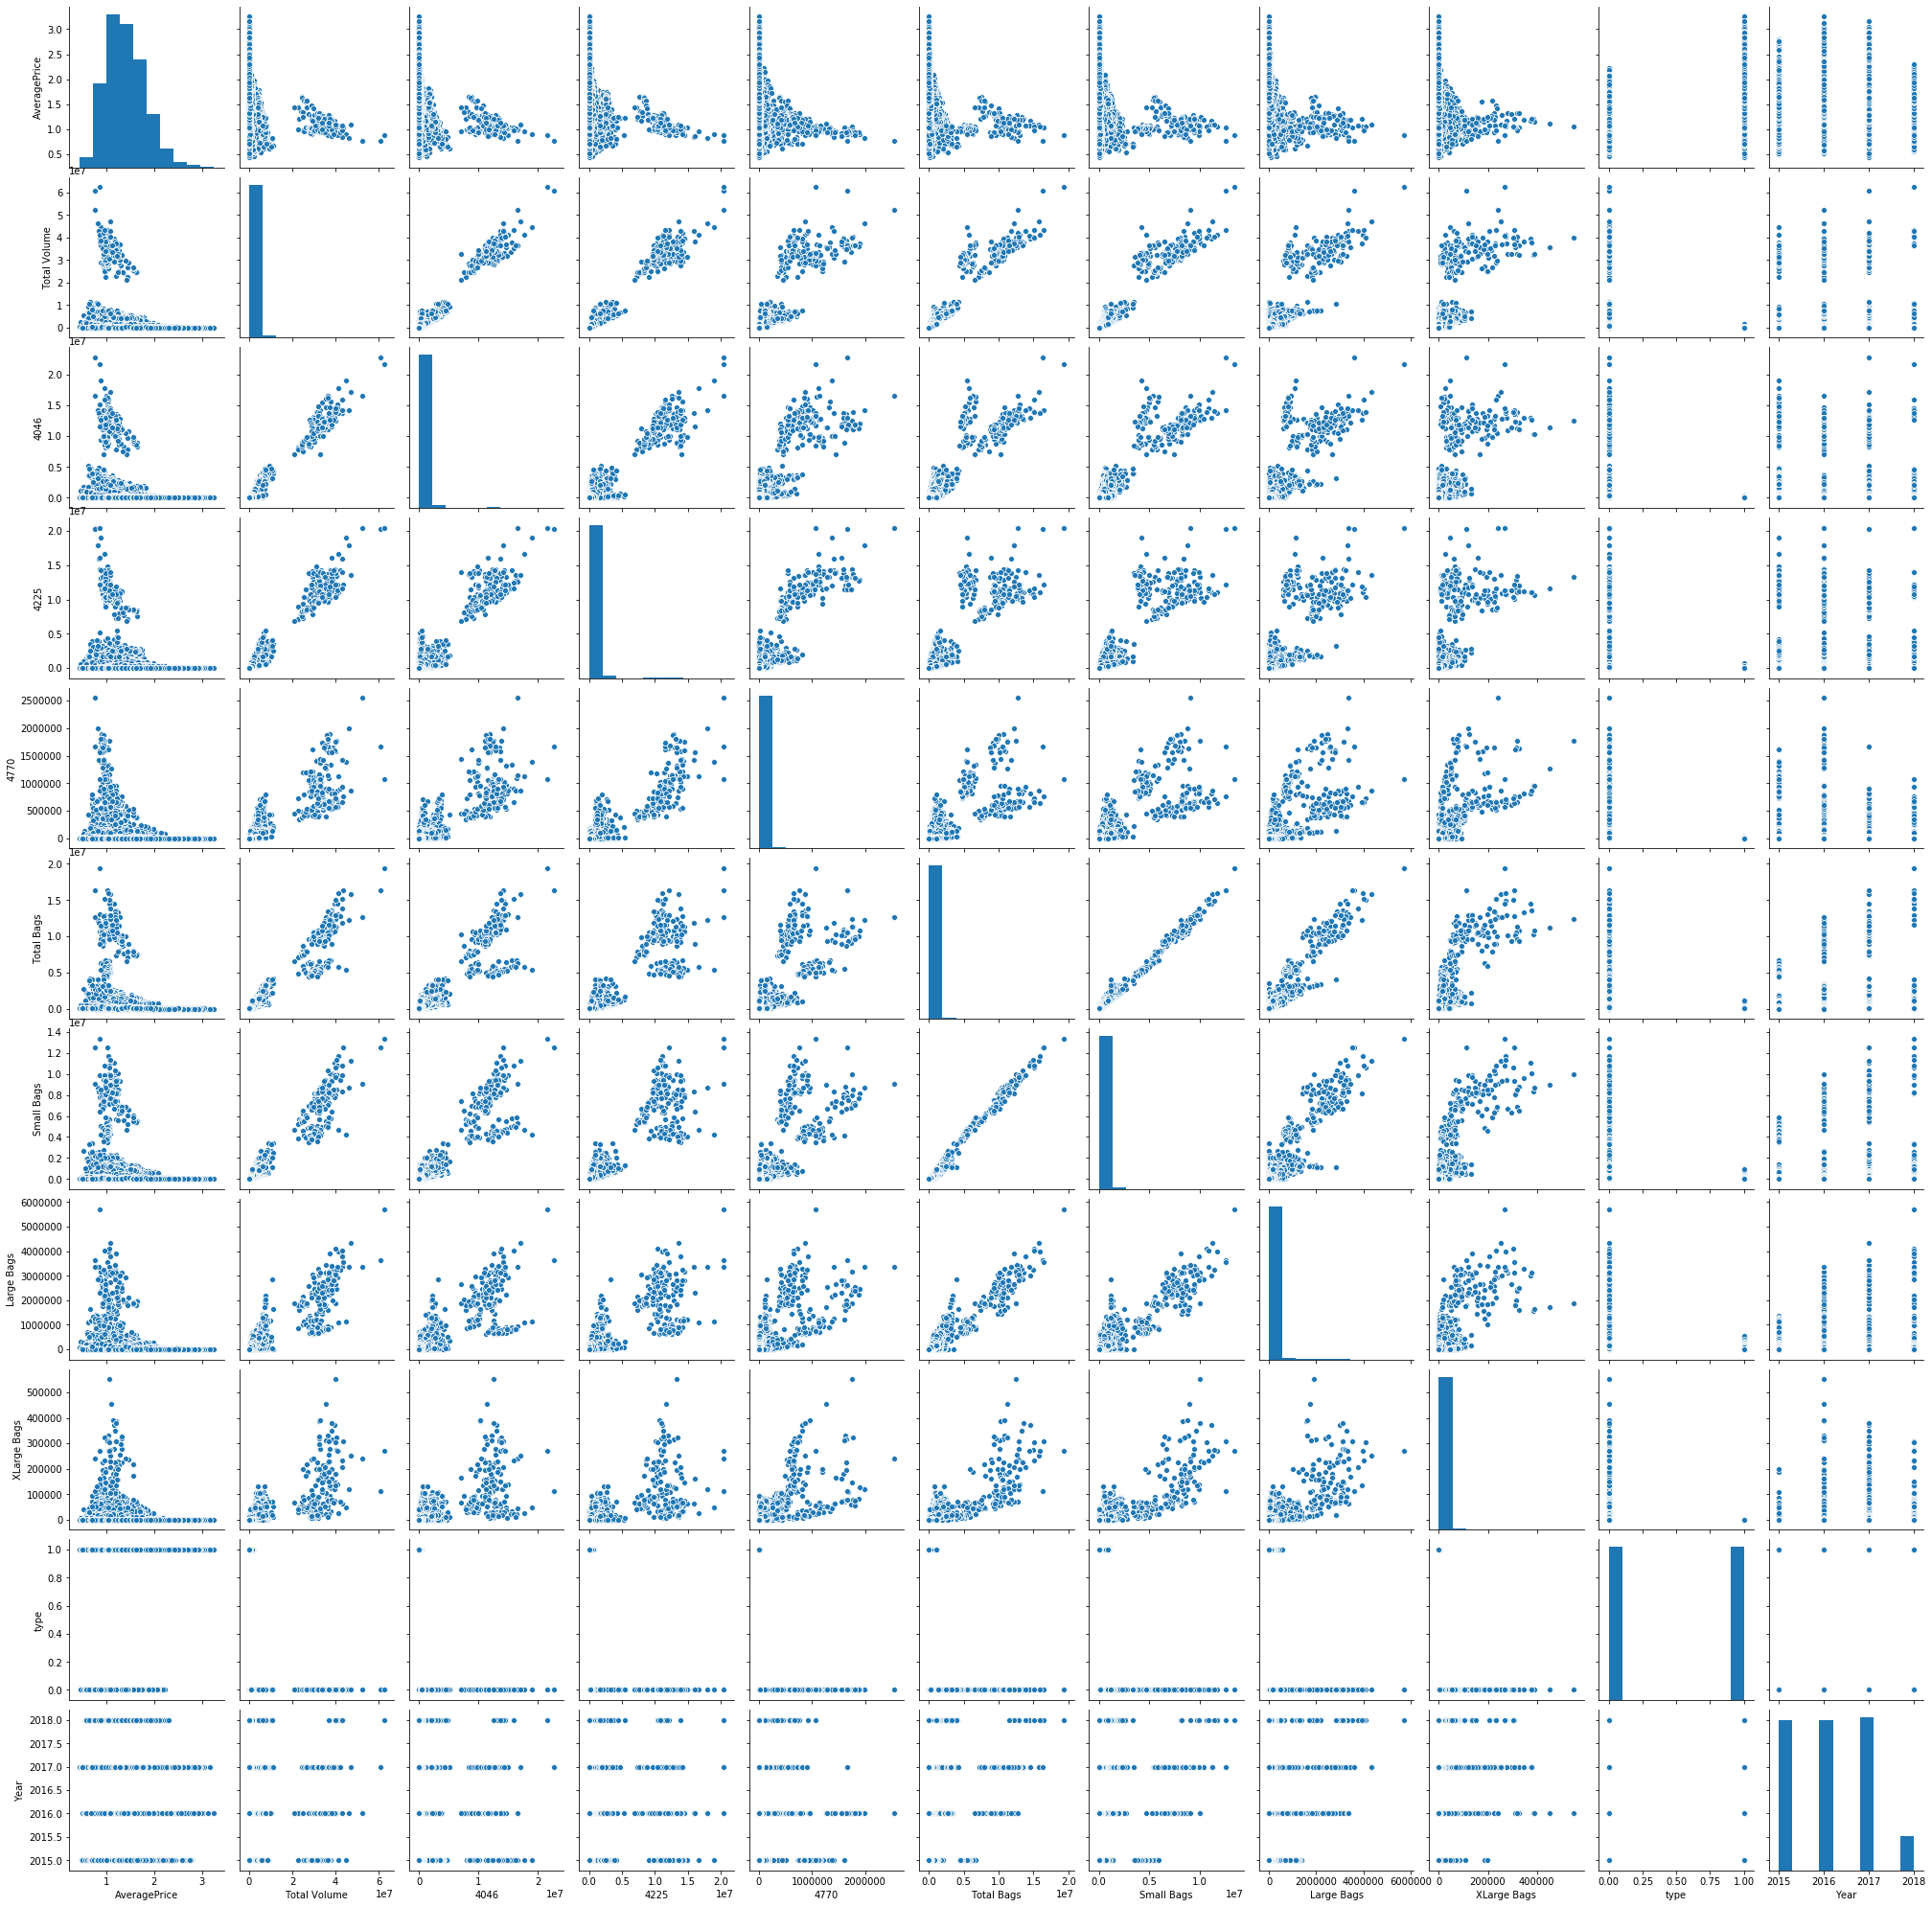

In [24]:
sns.pairplot(df)

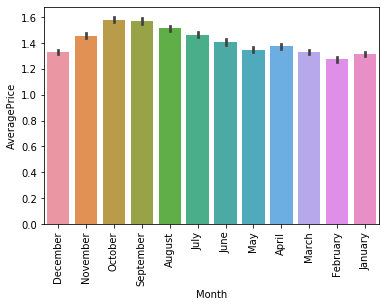

In [26]:
# Lets make barplot for Avarageprice during the month 
sns.barplot(x="Month",y="AveragePrice",data=df)
plt.xticks(rotation="vertical")
plt.show()

In [27]:
df['Day'].unique()

array(['Sunday'], dtype=object)

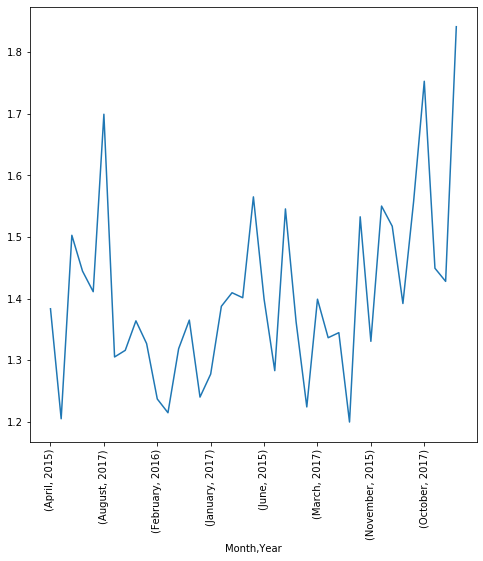

In [28]:
byDate=df.groupby(['Month','Year']).mean()
plt.figure(figsize=(8,8))
byDate['AveragePrice'].plot()
plt.xticks(rotation="vertical")
plt.show()

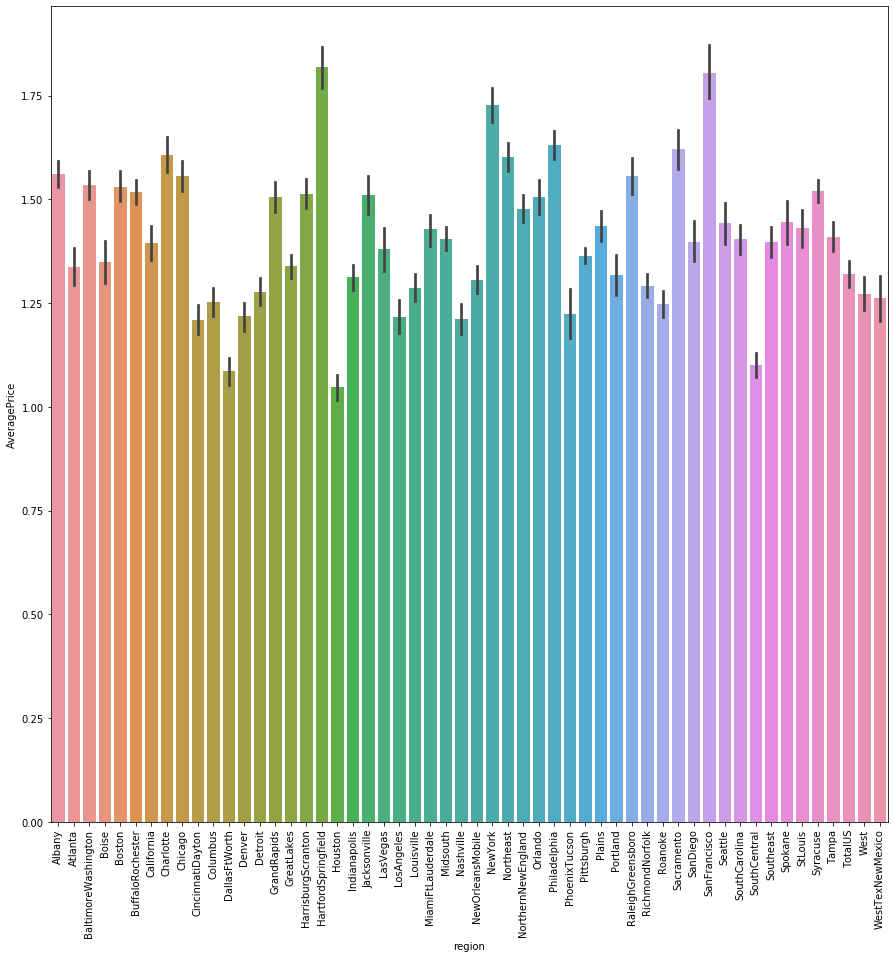

In [29]:
plt.subplots(figsize=(15,15))
sns.barplot(x="region",y="AveragePrice",data=df)
plt.xticks(rotation="vertical")
plt.show()

In [30]:
# drop the column "region" and "Day" 
df.drop(['region','Day'],axis=1,inplace=True)
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,Month,Year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,December,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,December,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,December,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,December,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,November,2015


In [31]:
# again use labelEncoder for the colum "Month"
le=LabelEncoder()
df['Month']=le.fit_transform(df['Month'])

In [32]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
Month            0.027653
Year             0.215339
dtype: float64

In [33]:
#Removing Skewness
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [34]:
df.skew()

AveragePrice    0.138629
Total Volume    0.088098
4046           -0.328195
4225           -0.486654
4770            0.099986
Total Bags     -0.218874
Small Bags     -0.622148
Large Bags     -0.547765
XLarge Bags     1.176494
type            0.000329
Month           0.027653
Year            0.215339
dtype: float64

In [35]:
# still have some skewness so I can try other method
for i in df.columns:
    if df.skew()[i]>0.55:
        df[i]=np.sqrt(df[i])

In [36]:
df.skew()

AveragePrice    0.138629
Total Volume    0.088098
4046           -0.328195
4225           -0.486654
4770            0.099986
Total Bags     -0.218874
Small Bags     -0.622148
Large Bags     -0.547765
XLarge Bags     0.865529
type            0.000329
Month           0.027653
Year            0.215339
dtype: float64

In [37]:
# Removing Outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.11191784, 0.10728205, 0.60975177, ..., 0.99983562, 1.03050323,
        1.22128204],
       [0.06002047, 0.1759487 , 0.73770703, ..., 0.99983562, 1.03050323,
        1.22128204],
       [1.25556016, 0.15869039, 0.68884013, ..., 0.99983562, 1.03050323,
        1.22128204],
       ...,
       [1.15374345, 0.77890112, 0.56825116, ..., 1.00016441, 0.43308111,
        1.97050371],
       [1.2793746 , 0.70779758, 0.49440715, ..., 1.00016441, 0.43308111,
        1.97050371],
       [0.6003593 , 0.67454176, 0.30415101, ..., 1.00016441, 0.43308111,
        1.97050371]])

In [38]:
threshold=3
print(np.where(z>3))

(array([ 9189,  9190,  9191,  9192,  9192,  9203,  9204,  9205,  9206,
        9211,  9212,  9212,  9213,  9218,  9219,  9220,  9221,  9293,
        9294,  9298,  9668,  9894,  9894, 10154, 10232, 10234, 10324,
       10325, 10326, 10327, 10331, 10332, 10333, 10334, 10334, 10375,
       10377, 10380, 10382, 10388, 10392, 10397, 10398, 10417, 10419,
       10420, 10531, 10532, 10533, 10534, 10535, 10536, 10562, 10563,
       10566, 11011, 11012, 11014, 11015, 11016, 11017, 11018, 11019,
       11020, 11021, 11022, 11023, 11024, 11024, 11025, 11026, 11027,
       11028, 11029, 11030, 11031, 11032, 11033, 11034, 11035, 11036,
       11037, 11039, 11040, 11041, 11042, 11314, 11316, 11318, 11319,
       11320, 11320, 11321, 11321, 11322, 11324, 11325, 11325, 11326,
       11327, 11329, 11330, 11331, 11332, 11333, 11333, 11334, 11335,
       11336, 11337, 11338, 11338, 11339, 11340, 11341, 11342, 11347,
       11347, 11348, 11348, 11349, 11349, 11350, 11350, 11351, 11352,
       11353, 11354

In [39]:
# Removing outliers
df_new=df[(z<3).all(axis=1)]
print(df_new)

       AveragePrice  Total Volume      4046       4225      4770  Total Bags  \
0          0.845868     11.070344  6.944801  10.905146  3.895080    9.070833   
1          0.854415     10.912867  6.515127  10.706381  4.083115    9.159737   
2          0.657520     11.680313  6.679222  11.600485  4.879007    9.005325   
3          0.732368     11.277116  7.032624  11.184108  4.298373    8.667708   
4          0.824175     10.840377  6.848515  10.688288  4.340944    8.729874   
...             ...           ...       ...        ...       ...         ...   
18244      0.966984      9.745419  7.624599   7.333154  0.000000    9.510421   
18245      0.996949      9.538855  7.083975   8.141044  0.000000    9.134090   
18246      1.054312      9.530085  7.084159   7.805389  6.591591    9.147945   
18247      1.075002      9.693150  7.332127   8.000363  6.590315    9.302969   
18248      0.963174      9.769418  7.971006   7.765200  5.418453    9.393924   

       Small Bags  Large Bags  XLarge B

In [40]:
print(df.shape)
print(df_new.shape)

(18249, 12)
(17934, 12)


#Separating the target and input variable


In [41]:
x=df_new.iloc[:,1:]
y=pd.DataFrame(df_new.iloc[:,:1])
print(x.shape)
print(y.shape)

(17934, 11)
(17934, 1)



Applying Standardscaler for scaling data

In [42]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
x=pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.127629,-0.622728,0.360830,-0.297918,-0.539391,-0.317291,-0.683118,-0.70083,-0.982423,-1.028185,-1.234219
1,-0.196637,-0.750677,0.289690,-0.252529,-0.498956,-0.279889,-0.671631,-0.70083,-0.982423,-1.028185,-1.234219
2,0.139669,-0.701812,0.609700,-0.060414,-0.569185,-0.345527,-0.657069,-0.70083,-0.982423,-1.028185,-1.234219
3,-0.037018,-0.596575,0.460674,-0.200569,-0.722738,-0.491228,-0.589782,-0.70083,-0.982423,-1.028185,-1.234219
4,-0.228404,-0.651400,0.283215,-0.190293,-0.694464,-0.469063,-0.488431,-0.70083,-0.982423,1.064526,-1.234219


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [44]:
def maxr2_score(regr,x,y):
    max_r2_score=0
    for r_state in range(42,100):
        train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.20)
        regr.fit(train_x,train_y)
        pred=regr.predict(test_x)
        r2score=r2_score(test_y,pred)
        print("The r2 score at r state", r_state, "is", r2score )
        if r2score>max_r2_score:
            max_r2_score=r2score
            final_r_state=r_state
    print("The max r2 score", max_r2_score, "is achieved at r_state", final_r_state)

In [45]:
lr=LinearRegression()
maxr2_score(lr,x,y)

The r2 score at r state 42 is 0.5436048396066537
The r2 score at r state 43 is 0.5440585812157743
The r2 score at r state 44 is 0.5496096117764184
The r2 score at r state 45 is 0.5425167787315829
The r2 score at r state 46 is 0.549231914266398
The r2 score at r state 47 is 0.5555261293022793
The r2 score at r state 48 is 0.5681275072288412
The r2 score at r state 49 is 0.5434315745582747
The r2 score at r state 50 is 0.5487059149403551
The r2 score at r state 51 is 0.5612303338869657
The r2 score at r state 52 is 0.5577514433021173
The r2 score at r state 53 is 0.5607373324274436
The r2 score at r state 54 is 0.5473185883812657
The r2 score at r state 55 is 0.5478709676316396
The r2 score at r state 56 is 0.5390417110666954
The r2 score at r state 57 is 0.5536091666744779
The r2 score at r state 58 is 0.5557017082664639
The r2 score at r state 59 is 0.5538962553535808
The r2 score at r state 60 is 0.548764279050701
The r2 score at r state 61 is 0.5499506083201751
The r2 score at r stat

In [46]:
#Lets finalise the train and test data
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=77,test_size=0.20)
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(14347, 11)
(14347, 1)
(3587, 11)
(3587, 1)


In [47]:
#Let use Linear Regression and check max r2 score corresponding to different random states
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
r_state=maxr2_score(lr,x,y)

The r2 score at r state 42 is 0.5436048396066537
The r2 score at r state 43 is 0.5440585812157743
The r2 score at r state 44 is 0.5496096117764184
The r2 score at r state 45 is 0.5425167787315829
The r2 score at r state 46 is 0.549231914266398
The r2 score at r state 47 is 0.5555261293022793
The r2 score at r state 48 is 0.5681275072288412
The r2 score at r state 49 is 0.5434315745582747
The r2 score at r state 50 is 0.5487059149403551
The r2 score at r state 51 is 0.5612303338869657
The r2 score at r state 52 is 0.5577514433021173
The r2 score at r state 53 is 0.5607373324274436
The r2 score at r state 54 is 0.5473185883812657
The r2 score at r state 55 is 0.5478709676316396
The r2 score at r state 56 is 0.5390417110666954
The r2 score at r state 57 is 0.5536091666744779
The r2 score at r state 58 is 0.5557017082664639
The r2 score at r state 59 is 0.5538962553535808
The r2 score at r state 60 is 0.548764279050701
The r2 score at r state 61 is 0.5499506083201751
The r2 score at r stat

In [48]:
#Importing necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [49]:
#Checking gridsearch for different algorithms
sr=SVR()
parameters={'kernel':('linear','rbf'), 'C':[1,10]}
gdsr=GridSearchCV(sr,parameters)
gdsr.fit(train_x,train_y)
gdsr.best_params_

{'C': 10, 'kernel': 'rbf'}

In [50]:
knn=KNeighborsRegressor()
parameters={'n_neighbors':(1,10)}
gdk=GridSearchCV(knn,parameters)
gdk.fit(train_x,train_y)
gdk.best_params_

{'n_neighbors': 1}

In [51]:
# checking the model and its metrics by running a set of codes.
score=[]
cv=[]
MSE=[]
RMSE=[]
MAE=[]


algorithm=[LinearRegression(),SVR(C= 10, kernel= 'rbf'),DecisionTreeRegressor(),KNeighborsRegressor(n_neighbors=10)]
for i in algorithm:
    l=i
    print(l)
    l.fit(train_x,train_y)
    pred=l.predict(test_x)
    r2score=r2_score(test_y,pred)
    print("R2 score", r2score)
    score.append(r2score)
    crossscore=cross_val_score(l,x,y,cv=5,scoring='r2').mean()
    print("The CV Score is", crossscore)
    cv.append(crossscore)
    mean_sqrd_error=mean_squared_error(test_y,pred)
    MSE.append(mean_sqrd_error)
    print("Mean Squared Error is", mean_sqrd_error )
    rootMSE=np.sqrt(mean_sqrd_error)
    RMSE.append(rootMSE)
    print("Root Mean Squared Error is: ",rootMSE)
    Meanabserror=mean_absolute_error(test_y,pred)
    MAE.append(Meanabserror)
    print("Mean Absolute Error is: ", Meanabserror)
    print("\n")

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2 score 0.537494682391687
The CV Score is 0.24903118456646442
Mean Squared Error is 0.012411424574347109
Root Mean Squared Error is:  0.11140657329954597
Mean Absolute Error is:  0.08832161237853117


SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R2 score 0.7642647719595788
The CV Score is 0.2517005635228176
Mean Squared Error is 0.006326002947317496
Root Mean Squared Error is:  0.07953617382875226
Mean Absolute Error is:  0.06212956954012552


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      ran

In [52]:
result=pd.DataFrame({'Model':['LinearRegression','SVR','DecisionTreeRegressor','KNeighborsRegressor'],'R2score':score,'Cross_val_score':cv,'Mean Squared Error':MSE, 'Root Mean Squared Error': RMSE, 'Mean Absolute Error':MAE})
result

,Model,R2score,Cross_val_score,Mean Squared Error,Root Mean Squared Error,Mean Absolute Error
0,LinearRegression,0.537495,0.249031,0.012411,0.111407,0.088322
1,SVR,0.764265,0.251701,0.006326,0.079536,0.062130
2,DecisionTreeRegressor,0.732543,-0.230018,0.007177,0.084719,0.057075
3,KNeighborsRegressor,0.796404,0.196020,0.005464,0.073916,0.054945


In [53]:
#Since the models are not giving better scores, we can try Lasso
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf=GridSearchCV(lsreg,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.001}

In [54]:
#Lets check max r2 score when to use
lsreg=Lasso(alpha=0.001)
r_state=maxr2_score(lsreg,x,y)

The r2 score at r state 42 is 0.5420223679348959
The r2 score at r state 43 is 0.5394229782584177
The r2 score at r state 44 is 0.545450570432856
The r2 score at r state 45 is 0.5378774109470648
The r2 score at r state 46 is 0.5457989680325621
The r2 score at r state 47 is 0.5516117045054723
The r2 score at r state 48 is 0.5624799815063453
The r2 score at r state 49 is 0.5393587260785309
The r2 score at r state 50 is 0.5448152888710208
The r2 score at r state 51 is 0.5579911549556963
The r2 score at r state 52 is 0.5510655840271521
The r2 score at r state 53 is 0.5544587724564678
The r2 score at r state 54 is 0.5429387318250665
The r2 score at r state 55 is 0.5436291067595493
The r2 score at r state 56 is 0.537803587072615
The r2 score at r state 57 is 0.5472316309558833
The r2 score at r state 58 is 0.5518387003143059
The r2 score at r state 59 is 0.5472262775636711
The r2 score at r state 60 is 0.5453009263823732
The r2 score at r state 61 is 0.5456998361346295
The r2 score at r stat

In [55]:
#Lets use cross val score with Lasso
print("Mean r2 score for Lasso Regression:", cross_val_score(lsreg,x,y,cv=5,scoring='r2').mean())
print("standard deviation in r2 score for Lasso Regression: ", cross_val_score(lsreg,x,y,cv=5,scoring='r2').std())
#The lasso here is performing just like Linear Regression

Mean r2 score for Lasso Regression: 0.23842708735639723
standard deviation in r2 score for Lasso Regression:  0.15467793959058684


In [56]:
#Now we will have to use gradient boosting technique
#for getting best parameters we need to use grid search
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 1000}

In [59]:
#Now we will use cross val score to check the mean r2 score and standard deviation
gbr=GradientBoostingRegressor(learning_rate=0.01,n_estimators=1000)
print("Mean r2 score for Gradient boosting Regression:", cross_val_score(gbr,x,y,cv=5,scoring='r2').mean())
print("standard deviation in r2 score for Gradient boosting Regression: ", cross_val_score(gbr,x,y,cv=5,scoring='r2').std())

Mean r2 score for Gradient boosting Regression: 0.37002714417861815
standard deviation in r2 score for Gradient boosting Regression:  0.20901818248978202


In [58]:
# Lets check the maximum r2 score corresponding to this
r_state=maxr2_score(gbr,x,y)

The r2 score at r state 42 is 0.4568489452083777
The r2 score at r state 43 is 0.4648090270803925
The r2 score at r state 44 is 0.4695137153213099
The r2 score at r state 45 is 0.4608435724544234
The r2 score at r state 46 is 0.4707970257588524
The r2 score at r state 47 is 0.4735254573683967
The r2 score at r state 48 is 0.47614407495661537
The r2 score at r state 49 is 0.4672316417493253
The r2 score at r state 50 is 0.46412577868960136
The r2 score at r state 51 is 0.47176803610663853
The r2 score at r state 52 is 0.4729090553787829
The r2 score at r state 53 is 0.46587335034423316
The r2 score at r state 54 is 0.4655741961714547
The r2 score at r state 55 is 0.47214933522030955
The r2 score at r state 56 is 0.46766678276997553
The r2 score at r state 57 is 0.4672630884218987
The r2 score at r state 58 is 0.4640289598162197
The r2 score at r state 59 is 0.4613014880272801
The r2 score at r state 60 is 0.47025132511972645
The r2 score at r state 61 is 0.4661844542788731
The r2 score 

In [61]:
#After trying all above let us finalise the model.KNeighborsRegressor is providing the highest accuracy score at 0.797463
knn=KNeighborsRegressor(n_neighbors=10)
knn.fit(train_x,train_y)
pred=knn.predict(test_x)
r2score=r2_score(test_y,pred)
print(r2score)

0.7964038982553017


In [62]:
#lets save the final model
from sklearn.externals import joblib

#save the model as pickle in a file
joblib.dump(knn,'Avacado.pkl')

['Avacado.pkl']